In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [87]:
paht_to_file = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-natalija-fedorova--fa3d5/ВШЭ_2_семестр/final_games.csv"

In [88]:
df = pd.read_csv(paht_to_file)

In [89]:
df.shape

(140792, 32)

In [90]:
df.head(2)

,Game_ID,Rated,Variant,Speed,Created_At,Last_Move_At,Game_Status,Source,Winner,Opening_Name,...,Black_Inaccuracy,Black_Mistake,Black_Blunder,Black_ACPL,Clocks,Analysis,Total_Time_Init,Total_Time_Increment,Total_Time,Moves
0,PsevV6VH,True,standard,classical,2024-12-15T11:09:25.224000+00:00,2024-12-15T11:55:14.775000+00:00,resign,pool,white,English Opening: Symmetrical Variation,...,5,1,1,47,"[180003, 180003, 178499, 178019, 178339, 17757...","[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",1800,0,1800,Nf3 c5 c4 Nc6 Nc3 g6 e3 Bg7 d4 cxd4 exd4 d6 h3...
1,diLZa8sj,True,standard,classical,2024-10-28T13:54:16.605000+00:00,2024-10-28T14:32:21.403000+00:00,resign,pool,white,"French Defense: Winawer Variation, Advance Var...",...,4,0,1,31,"[180003, 180003, 179827, 179683, 178619, 17936...","[{'eval': 18}, {'eval': 28}, {'eval': 28}, {'e...",1800,0,1800,e4 e6 d4 d5 Nc3 Bb4 e5 Ne7 a3 Bxc3+ bxc3 b6 Bb...


In [91]:
df.shape

(140792, 32)

In [92]:
# Выберем 8 столбцов для анализа + дополнительно столбец Winner(необходим для анализа столбца 'Analysis') 

df_1 = df[['Variant', 'Speed', 'White_Mistake', 'Black_Mistake', 'White_Blunder', 'Black_Blunder', 'Analysis', 'Opening_ECO', 'Winner']]

In [93]:
df_1

,Variant,Speed,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder,Analysis,Opening_ECO,Winner
0,standard,classical,1,1,1,1,"[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",A30,white
1,standard,classical,0,0,0,1,"[{'eval': 18}, {'eval': 28}, {'eval': 28}, {'e...",C16,white
2,standard,classical,1,1,4,5,"[{'eval': 17}, {'eval': 17}, {'eval': 11}, {'e...",A48,black
3,standard,classical,0,1,1,2,"[{'eval': 16}, {'eval': 17}, {'eval': 15}, {'e...",E94,white
4,standard,classical,2,1,2,2,"[{'eval': 17}, {'eval': 18}, {'eval': 23}, {'e...",A15,NaN
...,...,...,...,...,...,...,...,...,...
140787,standard,ultraBullet,4,2,4,4,"[{'eval': 0}, {'eval': 40}, {'eval': 56}, {'ev...",B06,black
140788,standard,ultraBullet,3,1,5,6,"[{'eval': -13}, {'eval': -24}, {'eval': 0}, {'...",C00,black
140789,standard,ultraBullet,0,1,4,5,"[{'eval': 16}, {'eval': 13}, {'eval': -13}, {'...",A00,white
140790,standard,ultraBullet,3,3,12,11,"[{'eval': 9}, {'eval': 40}, {'eval': -5}, {'ev...",A00,black


In [94]:
df_1.shape

(140792, 9)

In [95]:
# 1. Обработка пропусков и аномалий
df_1.isna().sum()

Variant              0
Speed                0
White_Mistake        0
Black_Mistake        0
White_Blunder        0
Black_Blunder        0
Analysis             0
Opening_ECO       1270
Winner           13689
dtype: int64

In [96]:
# У нас 1270 пропусков в столбце Opening_ECO из 140792 записей, это составляет примерно 0.88% от общего объема данных. 
# все эти пропуски относятся к строкам с варианту шахмат fromPosition
# то есть по всем строкам с вариантом шахмат fromPosition отсутствуют данныые по дебюту
# следовательно эти пропуски мы удалить не можем, они нам важны, заменим их на запись "неизвесно"

In [97]:
# Замена пропусков на 'неизвестно'
df_1.fillna('неизвестно', inplace=True)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [98]:
# 2. Проверим типы данных.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140792 entries, 0 to 140791
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Variant        140792 non-null  object
 1   Speed          140792 non-null  object
 2   White_Mistake  140792 non-null  int64 
 3   Black_Mistake  140792 non-null  int64 
 4   White_Blunder  140792 non-null  int64 
 5   Black_Blunder  140792 non-null  int64 
 6   Analysis       140792 non-null  object
 7   Opening_ECO    140792 non-null  object
 8   Winner         140792 non-null  object
dtypes: int64(4), object(5)
memory usage: 9.7+ MB


In [99]:
# 3. Анализ категориальных переменных

In [100]:
# 3.1 варианты шахмат
variant_count = df_1['Variant'].value_counts()

In [101]:
variant_count

standard        139522
fromPosition      1270
Name: Variant, dtype: int64

In [102]:
# standard - это означает, что все фигуры находятся на своих стандартных местах, и игроки начинают партию с заранее установленной
#            позиции.


# fromPosition - этот вариант подразумевает, что партия начинается не с начальной позиции, а с заранее заданной позиции, 
#                которая может быть получена в результате предыдущих ходов или задана для анализа.

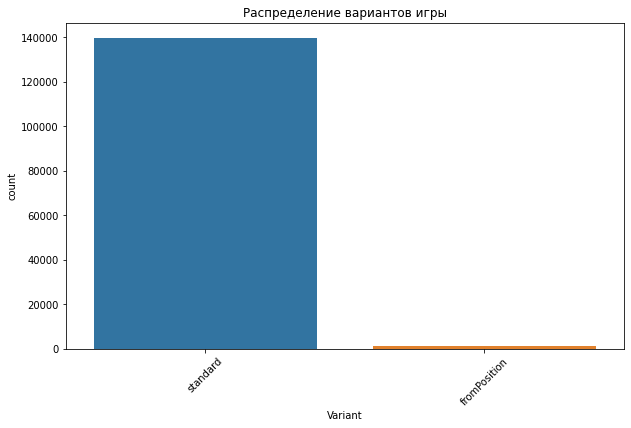

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='Variant', order=df_1['Variant'].value_counts().index)
plt.title('Распределение вариантов игры')
plt.xticks(rotation=45)
plt.show()

In [104]:
# 3.2. контроль времени партии.
speed_count = df_1['Speed'].value_counts()

In [105]:
speed_count

blitz          37873
rapid          33303
bullet         31291
classical      29591
ultraBullet     8734
Name: Speed, dtype: int64

In [106]:
# blitz - от 3-х до 10 минут.
# rapid - от 10 до 60 минут.
# bullet - менее 3-х минут.
# classical - от 60 минут до нескольких часов.
# ultraBullet - менее 1-ой минуты.

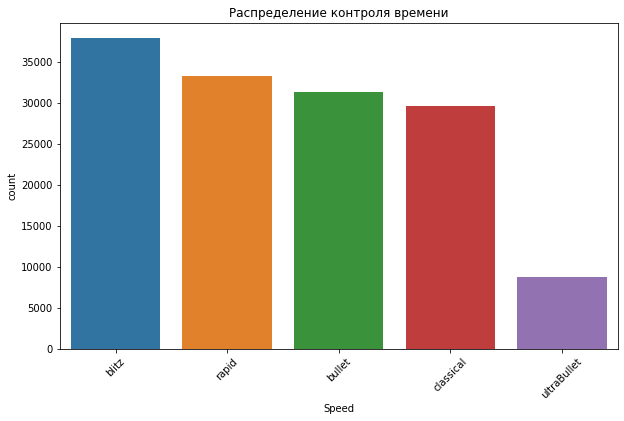

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='Speed', order=df_1['Speed'].value_counts().index)
plt.title('Распределение контроля времени')
plt.xticks(rotation=45)
plt.show()

In [108]:
# 3.3. код дебюта по системе ECO

In [109]:
opening_ECO_count = df_1['Opening_ECO'].value_counts()

In [110]:
opening_ECO_count

A00    6555
A04    4244
A45    3713
A40    3268
A05    3193
       ... 
D67       1
E55       1
A76       1
D98       1
E96       1
Name: Opening_ECO, Length: 489, dtype: int64

In [111]:
# Находим топ-30 дебютов.
top_openings = df_1['Opening_ECO'].value_counts().head(30)

In [112]:
top_openings

A00           6555
A04           4244
A45           3713
A40           3268
A05           3193
A01           3031
B12           2725
B00           2679
B06           2639
B01           2460
D02           2453
B10           2395
B40           2192
B23           2159
D00           1933
C00           1862
A46           1773
B90           1677
B22           1651
B30           1581
A43           1576
B13           1366
D01           1294
неизвестно    1270
B20           1244
C02           1237
D35           1217
B21           1152
A07           1128
B15           1122
Name: Opening_ECO, dtype: int64

In [113]:
# 4. Анализ числовых переменных. 

In [114]:
# 4.1. Выведем описательную статистику.
df_1[['White_Mistake', 'Black_Mistake', 'White_Blunder', 'Black_Blunder']].describe()

,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder
count,140792.000000,140792.000000,140792.000000,140792.000000
mean,1.177503,1.192397,1.697050,1.693271
std,1.307709,1.301948,1.929795,1.903644
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000
max,23.000000,21.000000,53.000000,53.000000


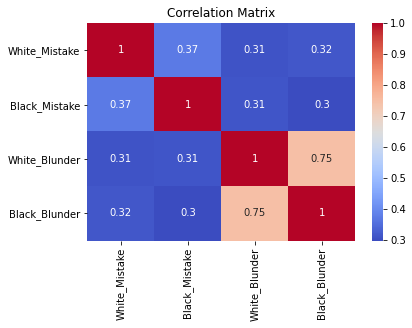

In [115]:
#  4.2. Рассмотрим корреляцию между числовыми переменными.
correlation_matrix = df_1[['White_Mistake', 'Black_Mistake', 'White_Blunder', 'Black_Blunder']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [116]:
# 4.3. Распределение ошибок белого игрока
white_mistake_count = df_1['White_Mistake'].value_counts()

In [117]:
white_mistake_count

0     54336
1     41261
2     24567
3     12266
4      5096
5      2052
6       789
7       273
8       100
9        38
10        9
12        2
11        2
23        1
Name: White_Mistake, dtype: int64

In [118]:
# 4.4. Распределение ошибок черного игрока
black_mistake_count = df_1['Black_Mistake'].value_counts()

In [119]:
black_mistake_count

0     52657
1     42443
2     25141
3     12139
4      5187
5      2059
6       732
7       274
8       107
9        31
10       11
11        5
13        2
12        2
21        1
14        1
Name: Black_Mistake, dtype: int64

In [120]:
# 4.5. Распределение грубых ошибок белого игрока
white_blunder_count = df_1['White_Blunder'].value_counts()

In [121]:
white_blunder_count

0     43468
1     38071
2     24877
3     14662
4      8163
5      4764
6      2858
7      1645
8       914
9       529
10      328
11      206
12      114
13       73
14       41
15       33
16       15
17        6
18        4
19        3
20        3
21        2
23        2
29        2
42        1
22        1
25        1
27        1
28        1
30        1
35        1
41        1
53        1
Name: White_Blunder, dtype: int64

In [122]:
# 4.6. Распределение грубых ошибок черного игрока
black_blunder_count = df_1['Black_Blunder'].value_counts()

In [123]:
black_blunder_count

0     42326
1     39097
2     25448
3     14560
4      8132
5      4710
6      2785
7      1521
8       881
9       514
10      309
11      188
12      150
13       64
14       41
15       27
16        9
17        9
18        4
23        3
20        2
28        2
43        1
19        1
21        1
22        1
25        1
27        1
29        1
37        1
38        1
53        1
Name: Black_Blunder, dtype: int64

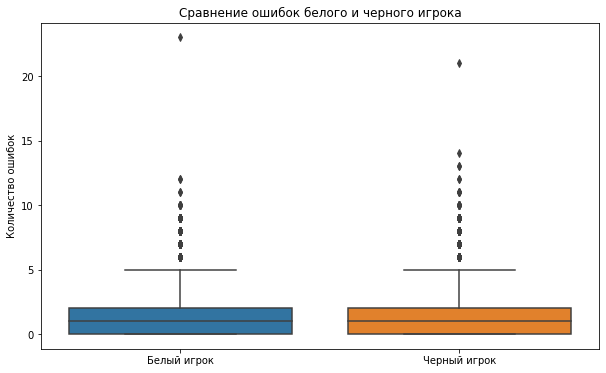

In [124]:
# 4.6. Коробчатая диаграмма для сравнения ошибок
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1[['White_Mistake', 'Black_Mistake']])
plt.title('Сравнение ошибок белого и черного игрока')
plt.ylabel('Количество ошибок')
plt.xticks([0, 1], ['Белый игрок', 'Черный игрок'])
plt.show()

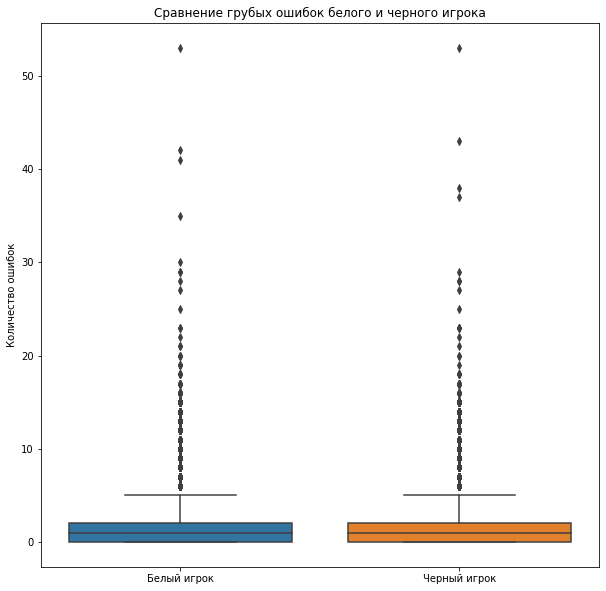

In [125]:
# 4.7. Коробчатая диаграмма для сравнения грубых ошибок
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_1[['White_Blunder', 'Black_Blunder']])
plt.title('Сравнение грубых ошибок белого и черного игрока')
plt.ylabel('Количество ошибок')
plt.xticks([0, 1], ['Белый игрок', 'Черный игрок'])
plt.show()

In [126]:
# Вывод: графики с ошибками белых и черных игроков похожи. 
# Их средние, минимальные, максимальные и медианные значения почти совпадают.

In [127]:
# 5. Узнаем количество партий, сыгранных без ошибок для белых и черных игроков

In [128]:
# количество партий без ошибок для белых игроков.
no_errors_white = df_1.query("White_Mistake == 0 and White_Blunder == 0")

In [129]:
count_no_errors_white = no_errors_white.shape[0]

In [130]:
# количество партий без ошибок для черных игроков.
no_errors_black = df_1.query("Black_Mistake == 0 and Black_Blunder == 0")

In [131]:
count_no_errors_black = no_errors_black.shape[0]

In [132]:
print(f"Количество партий без ошибок у белых: {count_no_errors_white}")
print(f"Количество партий без ошибок у черных: {count_no_errors_black}")

Количество партий без ошибок у белых: 24447
Количество партий без ошибок у черных: 22236


In [133]:
# Узнаем процент партий без ошибок у белых и черных в общем объеме

In [134]:
total_games = df_1.shape[0]

In [135]:
total_games

140792

In [136]:
# Вычисление процента безошибочных партий у белых
percentage_no_errors_white = (count_no_errors_white / total_games) * 100

In [137]:
# Вычисление процента безошибочных партий у черных
percentage_no_errors_black = (count_no_errors_black / total_games) * 100

In [138]:
print(f"Процент партий без ошибок у белых: {percentage_no_errors_white:.2f}%")
print(f"Процент партий без ошибок у черных: {percentage_no_errors_black:.2f}%")

Процент партий без ошибок у белых: 17.36%
Процент партий без ошибок у черных: 15.79%


In [139]:
# 6. Узнаем были ли такие партиии, где ни белые, ни черные не совершили ни одной ошибки.

In [140]:
no_errors_white_and_black = df_1.query("White_Mistake == 0 and White_Blunder == 0 and Black_Mistake == 0 and Black_Blunder == 0")

In [141]:
count_no_errors_white_and_black = no_errors_white_and_black.shape[0]

In [142]:
print(f"Количество партий, где ни белые, ни черные не совершили ни одной ошибки.: {count_no_errors_white_and_black}")

Количество партий, где ни белые, ни черные не совершили ни одной ошибки.: 5174


In [143]:
# Вычисление процента безошибочных партий у белых и черных одновременно
percentage_no_errors_white_and_black = (count_no_errors_white_and_black / total_games) * 100

In [144]:
print(f"Процент партий, где ни белые, ни черные не совершили ни одной ошибки: {percentage_no_errors_white_and_black:.2f}%")

Процент партий, где ни белые, ни черные не совершили ни одной ошибки: 3.67%


In [145]:
# 7. Исследуем медиану общего количества ошибок.

In [146]:
# Сложим все ошибки для одной партии
df_1['Total_Mistakes'] = df_1['White_Mistake'] + df_1['Black_Mistake'] + df_1['White_Blunder'] + df_1['Black_Blunder']

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
# 7.1. Вычислим медиану общего количества ошибок для каждого варианта шахмат (Variant)
median_errors_for_Variant = df_1.groupby('Variant')['Total_Mistakes'].median().reset_index(name='Median_Mistakes')

In [148]:
median_errors_for_Variant

,Variant,Median_Mistakes
0,fromPosition,2.0
1,standard,4.5


In [149]:
# Выводы:

# Медиана ошибок для партий fromPosition (2,5) меньше, чем для партий standard (4,5). Это может указывать на то, 
# что игроки, начиная с заранее заданной позиции, более уверенно принимают решения и делают меньше ошибок, чем игроки 
# в стандартных партиях (они уже имеют представление о позиции и возможных ходах, 
# что позволяет им принимать более обоснованные решения.)

# Игроки же, которые начинают с традиционной позиции, сталкиваются с большим количеством неопределенностей и сложностей, 
# что приводит к большему количеству ошибок.

In [150]:
# 7.2. Вычислим медиану общего количества ошибок для каждого контроля времени партии (Speed)
median_errors_for_Speed = df_1.groupby('Speed')['Total_Mistakes'].median().reset_index(name='Median_Mistakes')

In [151]:
median_errors_for_Speed

,Speed,Median_Mistakes
0,blitz,4
1,bullet,6
2,classical,4
3,rapid,4
4,ultraBullet,9


In [152]:
# Выводы:

# Чем меньше времени у игроков, тем больше вероятность ошибок. 
# Это видно из того, что в UltraBullet медиана ошибок значительно выше, чем в других форматах. 
# Игроки в этом формате, вероятно, делают много поспешных ходов, что приводит к большему количеству ошибок.

# Форматы с более длительным контролем времени (Blitz, Classical, Rapid) показывают схожие результаты, что может указывать на то,
#что игроки имеют достаточно времени для обдумывания ходов и, следовательно, делают меньше ошибок.

In [154]:
# 7.3. Вычислим медиану общего количества ошибок для 30 самых популярных дебютов.

In [155]:
# Группируем данные по дебютам и считаем количество партий
top_openings = df_1['Opening_ECO'].value_counts().head(30).index.tolist()

In [156]:
# Фильтруем DataFrame по топ-30 дебютам
filtered_df = df_1[df_1['Opening_ECO'].isin(top_openings)]

In [157]:
filtered_df.shape

(66789, 10)

In [158]:
filtered_df.head(1)

,Variant,Speed,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder,Analysis,Opening_ECO,Winner,Total_Mistakes
24,standard,classical,1,1,3,4,"[{'eval': 15}, {'eval': 35}, {'eval': 28}, {'e...",B15,white,9


In [159]:
median_errors_for_Opening_ECO = filtered_df.groupby('Opening_ECO')['Total_Mistakes'].median().reset_index(name='Median_Mistakes')

In [160]:
median_errors_for_Opening_ECO

,Opening_ECO,Median_Mistakes
0,A00,7
1,A01,5
2,A04,6
3,A05,5
4,A07,5
5,A40,6
6,A43,6
7,A45,4
8,A46,5
9,B00,5


In [161]:
# Самая большая медиана ошибок среди популярных дебютов в дебюте A00.
# код A00 обозначает "неопределенные дебюты". 
# Это может включать в себя различные нестандартные или редкие ходы, которые не соответствуют более известным дебютам.

In [162]:
# 8. Исследуем столбец Analysis.

# 8.1. Найдем партии, где выиграли белые, несмотря на то, что средняя оценка позиции (avg_eval) была в пользу черных,
# и наоборот, партии, где выиграли черные, несмотря на приемущество белых.

In [163]:
# Проверка типа данных первого элемента
print(type(df_1['Analysis'].iloc[0]))

<class 'str'>


In [164]:
# Так как тип данных столбца Analysis строка, то необходимо преобразование строки в списки.
df_1['Analysis'] = df_1['Analysis'].apply(ast.literal_eval)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
# Проверка типа данных после преобразования
print(type(df_1['Analysis'].iloc[0]))  # Должно вернуть <class 'list'>

<class 'list'>


In [166]:
# Создание столбца avg_eval.

# Извлекаем значения eval из каждого словаря в списке с проверкой наличия ключа
def extract_eval(x):
    return [item['eval'] for item in x if 'eval' in item]

df_1['eval'] = df_1['Analysis'].apply(extract_eval)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [167]:
# Найдем среднее значение eval для каждого элемента
df_1['avg_eval'] = df_1['eval'].apply(lambda x: sum(x) / len(x) if x else None)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [168]:
df_1.head(1)

,Variant,Speed,White_Mistake,Black_Mistake,White_Blunder,Black_Blunder,Analysis,Opening_ECO,Winner,Total_Mistakes,eval,avg_eval
0,standard,classical,1,1,1,1,"[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",A30,white,4,"[14, 25, 26, 23, 16, 39, 32, 44, 51, 89, 90, 8...",186.257576


In [169]:
# Фильтрация партий, где белые выиграли, несмотря на преимущество черных
white_wins_black_advantage = df_1.query("Winner == 'white' and avg_eval < 0")

In [170]:
white_wins_black_advantage.shape

(7707, 12)

In [171]:
# Фильтрация партий, где черные выиграли, несмотря на преимущество белых
black_wins_white_advantage = df_1.query("Winner == 'black' and avg_eval > 0")

In [172]:
black_wins_white_advantage.shape

(10713, 12)

In [173]:
# Число партий, где игроку получилось резко развернуть ход игры в свою пользу, несмотря на приемущество противника в ходе игры.
result = pd.concat([white_wins_black_advantage, black_wins_white_advantage], ignore_index=True)

In [174]:
result.shape

(18420, 12)

In [175]:
# Общее количество партий
total_games = len(df_1)

In [176]:
# Количество партий, соответствующих критериям
count_result = len(result)

In [177]:
percentage = count_result / total_games * 100

In [178]:
percentage

13.083129723279733

In [179]:
percentage = round(percentage, 0)

In [180]:
# Вывод результатов
print("Общее количество партий:", total_games)
print("Количество партий, где белые выиграли с преимуществом черных или черные выиграли с преимуществом белых:", count_result)
print("Процент таких партий в общем объеме:", percentage )


Общее количество партий: 140792
Количество партий, где белые выиграли с преимуществом черных или черные выиграли с преимуществом белых: 18420
Процент таких партий в общем объеме: 13.0


In [181]:
# 8.2. Сравним как распределяются значений eval в партиях с наибольшим и наименьшим числом ошибок.

df_2 = df_1[['Total_Mistakes','eval']]

In [182]:
df_2 = df_2.sort_values("Total_Mistakes", ascending=False)

In [183]:
df_2

,Total_Mistakes,eval
133927,150,"[0, 23, 17, 54, 49, 129, 98, 143, 111, 179, 16..."
135957,90,"[25, 29, -165, -76, -263, -29, -248, -78, -205..."
140229,89,"[-1500, -884, -2014, -773, -1996, -1210, -1910..."
91047,80,"[-96, 20, -119, 109, -314, 205, -354, 274, -62..."
103849,65,"[12, 35, 22, 47, 10, 73, 53, 76, 56, 82, 37, 3..."
...,...,...
22686,0,"[17, 17, 17, 11, 17, 17, 8, 25, 16, 17, 32, 50..."
22684,0,"[17, 24, 19, 27, 18, 32, 31, 49, 47, 43, 47, 3..."
115681,0,"[18, 36, 9, 100, 95, 129, 85, 85, 95, 92, 94, ..."
59348,0,"[18, 43, 43, 43, 38, 71, 67, 84, 46, 47, 37, 3..."


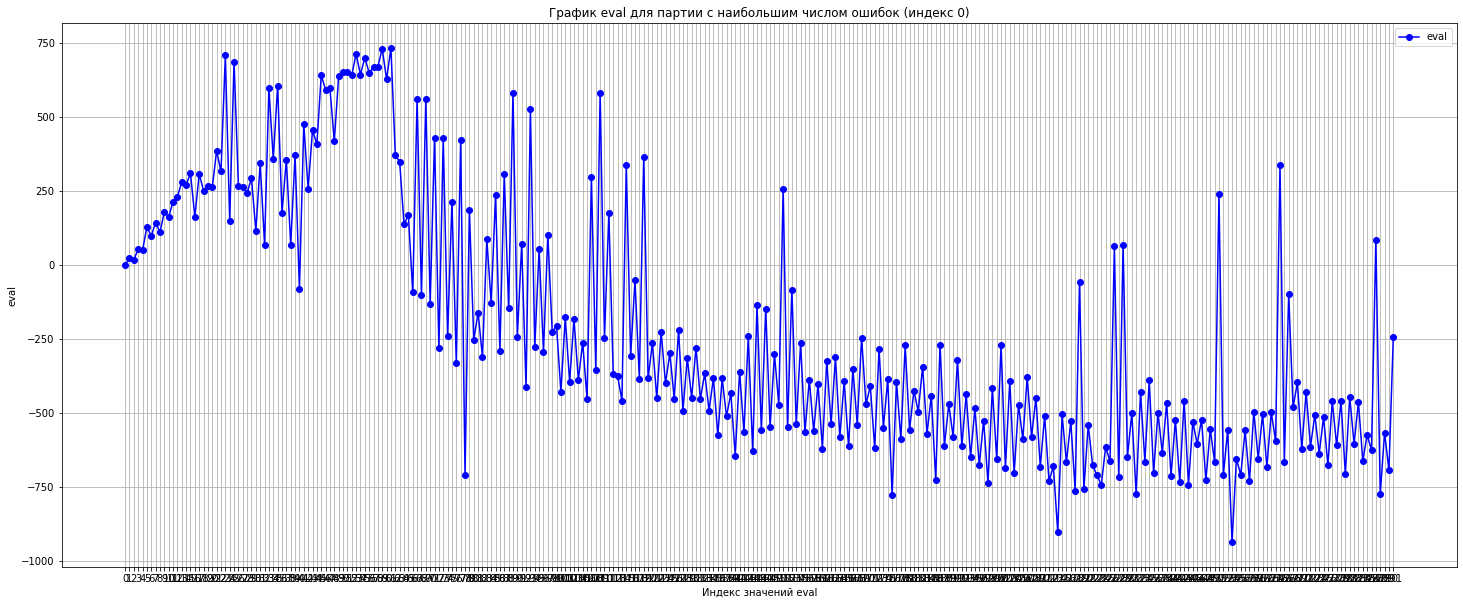

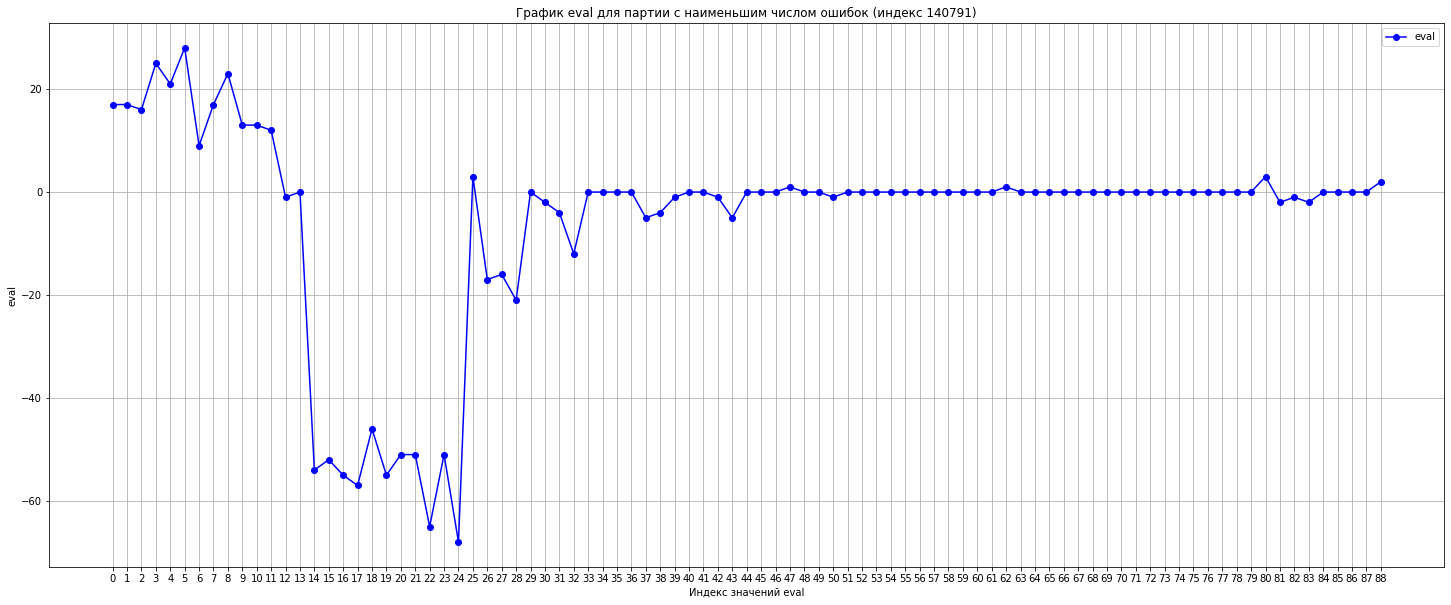

In [184]:
# Выбираем первую строку
row_index = 0  # Индекс первой строки
eval_values = df_2['eval'].iloc[row_index]

# Создаем массив индексов для значений eval
index_values = list(range(len(eval_values)))

# Построение графика
plt.figure(figsize=(25, 10))
plt.plot(index_values, eval_values, marker='o', color='blue', label='eval')
plt.title(f'График eval для партии с наибольшим числом ошибок (индекс {row_index})')
plt.xlabel('Индекс значений eval')
plt.ylabel('eval')
plt.xticks(index_values)  # Устанавливаем метки по оси X
plt.grid()
plt.legend()
plt.show()


# Выбираем последнюю строку
row_index = len(df) - 1  # Индекс последней строки
eval_values = df_2['eval'].iloc[row_index]

# Создаем массив индексов для значений eval
index_values = list(range(len(eval_values)))

# Построение графика
plt.figure(figsize=(25, 10))
plt.plot(index_values, eval_values, marker='o', color='blue', label='eval')
plt.title(f'График eval для партии с наименьшим числом ошибок (индекс {row_index})')
plt.xlabel('Индекс значений eval')
plt.ylabel('eval')
plt.xticks(index_values)  # Устанавливаем метки по оси X
plt.grid()
plt.legend()
plt.show()

In [185]:
# Вывод: Таким образом, мы прослеживаем закономерность между количеством ошибок и неоднородностью графика eval.
# Чем больше ошибок, тем более неоднароден график eval.
# При большом количестве ошибок по графику прослеживается постоянный перевес, то в сторону белого, то в сторону черного игрока.
# При отсутствии ошибок по графику прослеживается только несколько критических моментов в игре.